In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('trawlers.csv')

# Drop rows where is_fishing is not 1 or 0
df = df[df['is_fishing'].isin([0, 1])]

# Drop unnecessary parameters
df.drop(df.columns.difference(['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'is_fishing']), axis=1, inplace=True)
df.head()

,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
60646,0.0,0.0,0.0,128.0,52.458717,4.581316,0.0
60647,0.0,0.0,0.0,128.0,52.458733,4.581316,0.0
60648,0.0,0.0,0.0,128.0,52.458698,4.581267,0.0
60649,0.0,0.0,0.0,128.0,52.458698,4.581234,0.0
60650,0.0,0.0,0.0,128.0,52.458683,4.581183,0.0


In [3]:
# Filter rows where is_fishing is 1
fishing_rows = df[df['is_fishing'] == 1]

# Display a few rows
print(fishing_rows.head())

       distance_from_shore  distance_from_port  speed  course        lat  \
61241          3162.200195        24758.228516    2.1   358.0  58.266666   
61242          2236.013184        24041.039062    1.6   156.0  58.261967   
61243           999.975464        22671.011719    4.1   222.0  58.255520   
61244          2999.926270        21212.683594    3.0   329.0  58.252148   
61245          3605.462891        22671.011719    1.2    35.0  58.257801   

            lon  is_fishing  
61241 -6.211900         1.0  
61242 -6.212450         1.0  
61243 -6.211983         1.0  
61244 -6.232550         1.0  
61245 -6.228200         1.0  


In [4]:
# Drop rows with null values
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop('is_fishing', axis=1)
y = df['is_fishing']

# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)


LogisticRegression()

In [7]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7184873949579832
F1 Score: 0.48870892384363807
Precision: 0.6907836806574699
Recall: 0.37810265884810024
Confusion Matrix:
[[20430  2107]
 [ 7742  4707]]


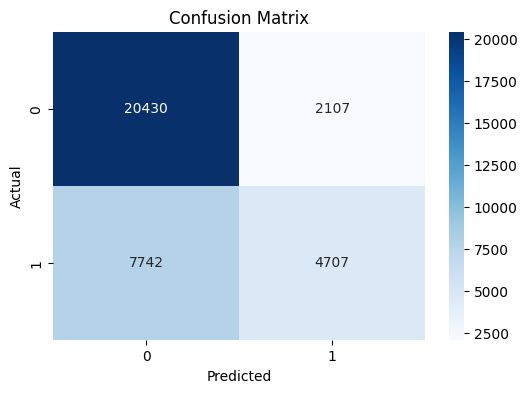

In [9]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

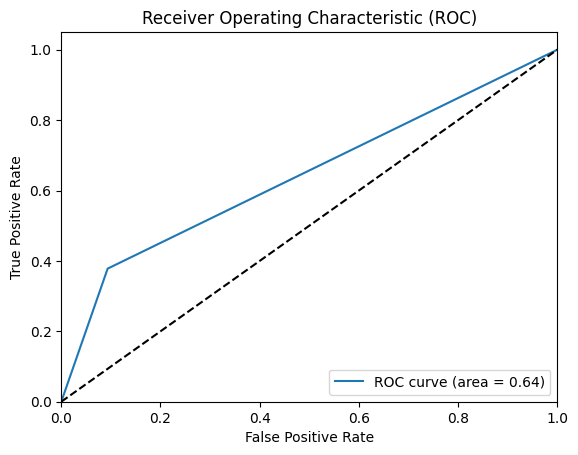

In [11]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [12]:
import joblib
joblib.dump(clf, 'logReg_model.pkl')
joblib.dump(scaler, 'scaler.pk1')

['scaler.pk1']